In [2]:
from sklearn import mixture
from MNE_Pipeline import MNE_Repo_Mat as MP
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [71]:
mp = MP()
RT_dict_sub = dict()
paths = np.sort([os.path.join('Data', file) for file in os.listdir('Data') if file.endswith('.mat')])
subjects = sorted([os.path.splitext(file)[0] for file in os.listdir('Data/') if file.endswith('.mat')])

for path, subject in zip(paths, subjects):
    data = mp.load_data_mat(path)
    RT_dict_sub[subject] = data['RT']

In [13]:
pickle.dump(RT_dict_sub, open('RT_dict_sub', 'wb'))

In [3]:
with open('RT_dict_sub', 'rb') as file:
    RT_dict_sub = pickle.load(file)

In [4]:
RTs = np.array([])
for s in RT_dict_sub:
    RTs = np.append(RTs, RT_dict_sub[s])

In [5]:
RTs = np.array([rt for rt in RTs if str(rt) != 'nan' and rt > 0])

In [6]:
[rt for rt in RTs if rt == 0]

[]

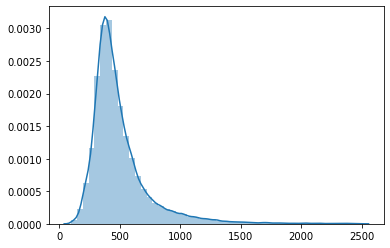

In [7]:
sns.distplot(RTs)

In [9]:
X = RTs.reshape((len(RTs), 1))

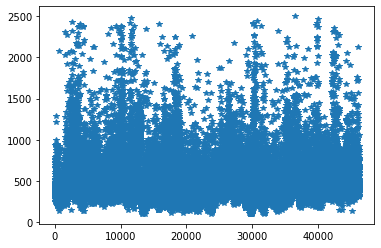

In [82]:
plt.plot(RTs, '*')

## From Rakib Vai

best point is(4,spherical)


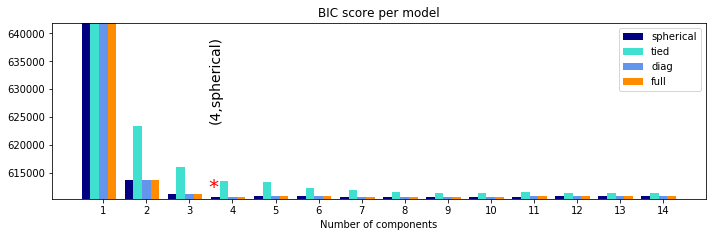

In [83]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
# print X.shape

lowest_bic = np.infty
bic = []
n_components_range = range(1, 15)
#n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(10,6 ))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))


plt.text(xpos-.2, bic.min() * 0.97 + .03 * bic.max(),
         '*', color='red',fontsize=20)

A=[]
for cv_type in cv_types:
    for n_components in n_components_range:
        A.append([n_components,cv_type])
a="({},{})".format(A[bic.argmin()][0],A[bic.argmin()][1])
print("best point is({},{})".format(A[bic.argmin()][0],A[bic.argmin()][1]))

plt.text(xpos-.2, bic.min() * 0.97 + .05 * bic.max(),
         a, color='black',fontsize=14,rotation=90)


spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.tight_layout()
#SaveImage('BNPY_Parameter')


In [8]:
BNPY=mixture.BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        n_components=4, reg_covar=0, init_params='random',
        max_iter=5000, mean_precision_prior=.8,
        random_state=42,
        verbose=1,
        covariance_type='spherical',
        verbose_interval=10)
BNPY.fit(X)

NameError: name 'X' is not defined

In [85]:
BNPY.means_

array([[ 850.01704366],
       [ 376.89435865],
       [1458.27950485],
       [ 531.03513531]])

Text(0, 0.5, 'Probability')

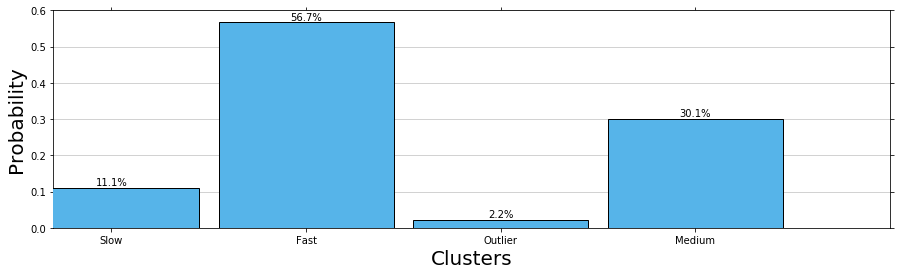

In [103]:
fig,ax2 = plt.subplots(1,1, figsize=(15,4))
n_components=4
index = np.arange(n_components)


ax2.yaxis.grid(True, alpha=0.7)
for k, w in enumerate(BNPY.weights_):
    ax2.bar(k, w, width=0.9, color='#56B4E9', zorder=3,
            align='center', edgecolor='black')
    ax2.text(k, w + 0.007, "%.1f%%" % (w * 100.),
             horizontalalignment='center')
ax2.set_xlim(-.3, n_components)
ax2.set_ylim(0., 0.6)
ax2.tick_params(axis='y', which='both', left='off',
                right='off', labelleft='off')
ax2.tick_params(axis='x', which='both', top='off')
ax2.set_xticks(range(4))
ax2.set_xticklabels(['Slow', 'Fast', 'Outlier', 'Medium'])
ax2.set_xlabel('Clusters',size=20)
ax2.set_ylabel('Probability',size=20)

In [87]:
preds = BNPY.predict(X)

In [91]:
np.unique(preds)

array([0, 1, 2, 3])

In [1]:
X

NameError: name 'X' is not defined

## 0 - Slow
## 1 - Fast
## 2 - Outlier
## 3 - Medium

cluster 0: min - 772.0, max - 1360.0, mean - 971.8211180124224
cluster 1: min - 100.0, max - 504.0, mean - 372.6188352570829
cluster 2: min - 1364.0, max - 2500.0, mean - 1711.4786450662739
cluster 3: min - 506.0, max - 770.0, mean - 602.508840330039


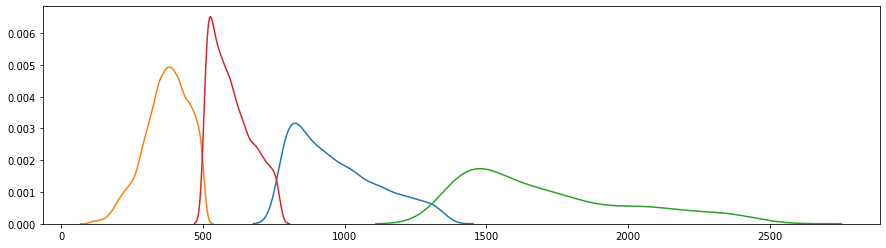

In [89]:
rts = np.array(RTs)
fig,ax = plt.subplots(1,1, figsize=(15,4))
for i in range(n_components):
    cluster = rts[[j for j in range(len(rts)) if preds[j] == i]]
    sns.distplot(cluster, rug=False, hist=False,ax = ax)
    print('cluster {}: min - {}, max - {}, mean - {}'.format(i, cluster.min(), cluster.max(), cluster.mean()))

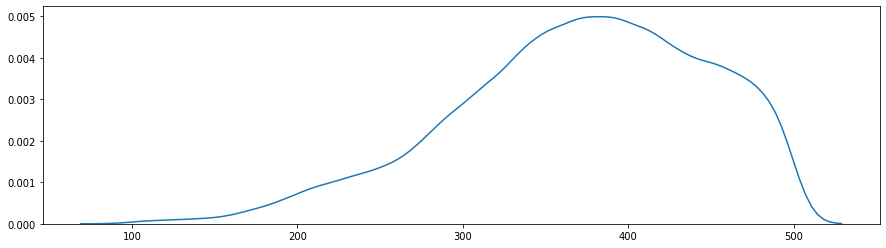

In [42]:
fig,ax = plt.subplots(1,1, figsize=(15,4))
sns.distplot(cluster, rug=False, hist=False,ax = ax)

In [93]:
with open('Bayesian_GMM_RT_model.pkl', 'wb') as file:
    pickle.dump(BNPY, file)

In [94]:
with open('Bayesian_GMM_RT_model.pkl', 'rb') as file:
    gmm = pickle.load(file)

In [96]:
gmm

BayesianGaussianMixture(covariance_prior=None, covariance_type='spherical',
                        degrees_of_freedom_prior=None, init_params='random',
                        max_iter=5000, mean_precision_prior=0.8,
                        mean_prior=None, n_components=4, n_init=1,
                        random_state=42, reg_covar=0, tol=0.001, verbose=1,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_distribution')